# Imports and Data

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
import seaborn as sns


In [2]:
test_case = {'capacities':{'A': 100, 'B': 150, 'C': 120},
             'opening_costs': {'A': 10, 'B': 12, 'C': 8},
             'demands': {1: 60, 2: 50, 3: 70, 4: 40},
             'transportation_costs':{
                'A': {1: 2, 2: 3, 3: 1, 4: 2},
                'B': {1: 3, 2: 2, 3: 2, 4: 1},
                'C': {1: 1, 2: 1, 3: 2, 4: 3}
             }}

test_case_2 = {'capacities':{'A': 200, 'B': 180, 'C': 160, 'D': 150, 'E': 140},
              'opening_costs':{'A': 2000, 'B': 2000, 'C': 1500, 'D': 1100, 'E': 2500},
              'demands':{1: 90, 2: 80, 3: 70, 4: 60, 5: 85, 6: 75},
              'transportation_costs':{
                  'A': {1: 4, 2: 6, 3: 5, 4: 3, 5: 2, 6: 3},
                  'B': {1: 5, 2: 3, 3: 4, 4: 2, 5: 6, 6: 5},
                  'C': {1: 3, 2: 4, 3: 2, 4: 5, 5: 3, 6: 4},
                  'D': {1: 6, 2: 5, 3: 3, 4: 4, 5: 5, 6: 2},
                  'E': {1: 2, 2: 1, 3: 6, 4: 1, 5: 4, 6: 6}
              }
              }



test_case_3 = {'capacities':{
                  'A': 200, 'B': 300, 'C': 150, 'D': 180, 'E': 220,
                  'F': 160, 'G': 140, 'H': 210, 'I': 130, 'J': 170
              },
              'opening_costs':{
                  'A': 2000, 'B': 2400, 'C': 7542, 'D': 7542, 'E': 4752,
                  'F': 1235, 'G': 3626, 'H': 3246, 'I': 3462, 'J': 8475
              },

              'demands':{
                  1: 110, 2: 95, 3: 120, 4: 85, 5: 100,
                  6: 90, 7: 80, 8: 115, 9: 105, 10: 75
              },
              'transportation_costs':{
                  'A': {1: 4, 2: 6, 3: 3, 4: 5, 5: 4, 6: 6, 7: 7, 8: 3, 9: 4, 10: 5},
                  'B': {1: 5, 2: 4, 3: 2, 4: 6, 5: 3, 6: 5, 7: 4, 8: 2, 9: 5, 10: 4},
                  'C': {1: 3, 2: 3, 3: 4, 4: 5, 5: 2, 6: 4, 7: 6, 8: 1, 9: 3, 10: 2},
                  'D': {1: 2, 2: 5, 3: 6, 4: 3, 5: 4, 6: 2, 7: 5, 8: 4, 9: 2, 10: 6},
                  'E': {1: 6, 2: 2, 3: 5, 4: 4, 5: 6, 6: 3, 7: 3, 8: 6, 9: 1, 10: 3},
                  'F': {1: 5, 2: 7, 3: 3, 4: 2, 5: 5, 6: 7, 7: 2, 8: 5, 9: 6, 10: 1},
                  'G': {1: 3, 2: 1, 3: 7, 4: 6, 5: 3, 6: 5, 7: 4, 8: 3, 9: 7, 10: 2},
                  'H': {1: 4, 2: 3, 3: 1, 4: 7, 5: 2, 6: 6, 7: 1, 8: 4, 9: 5, 10: 7},
                  'I': {1: 7, 2: 5, 3: 2, 4: 1, 5: 7, 6: 1, 7: 7, 8: 7, 9: 3, 10: 4},
                  'J': {1: 6, 2: 4, 3: 6, 4: 2, 5: 1, 6: 3, 7: 6, 8: 2, 9: 6, 10: 5}
              }
              }



In [54]:
import random
import string

def generate_test_case(N, M):
    # Generate random capacities and opening costs for N distribution centers
    POWER = 5
    capacities = {f'F{i+1}': random.randint(int((POWER+M/N)*30), int((POWER+M/N)*100)) for i in range(N)}
    opening_costs = {f'F{i+1}': random.randint(1000, 5000) for i in range(N)}  # Higher opening costs

    # Generate random demands for M clients
    demands = {i+1: random.randint(30, 100) for i in range(M)}

    # Generate random transportation costs for each facility-client pair
    transportation_costs = {f'F{i+1}': {j+1: random.randint(1, 50) for j in range(M)} for i in range(N)}

    test_case = {
        'capacities': capacities,
        'opening_costs': opening_costs,
        'demands': demands,
        'transportation_costs': transportation_costs
    }

    return test_case

# Example usage with N distribution centers and M clients
N = 25  # Number of distribution centers
M = 25 # Number of clients
test_case_giant = generate_test_case(N, M)

print(sum(test_case_giant['capacities'].values()))
print(sum(test_case_giant['demands'].values()))

9463
1787


# Functions

In [55]:
def adjust_fractions_to_integers(fractions, N):
    fractions[np.isnan(fractions)] = 1
    
    scaled_values = [f * N for f in fractions]  # Scale the values
    rounded_values = [round(v) for v in scaled_values]  # Round the values
    errors = [sv - rv for sv, rv in zip(scaled_values, rounded_values)]  # Calculate rounding errors
    

    sum_rounded = sum(rounded_values)  # Sum of rounded values
    adjustment = N - sum_rounded  # Required adjustment to reach N

    # Ensure no initial values are negative
    for i in range(len(rounded_values)):
        if rounded_values[i] < 0:
            rounded_values[i] = 0

    # Sort by proximity to the next integer, preferring adjustments that tip over to the next integer
    error_indices_sorted = sorted(range(len(errors)), key=lambda i: -abs(errors[i] - 0.5))

    # Adjust the values based on the errors, avoiding negatives
    for i in error_indices_sorted:
        if adjustment == 0:
            break  # No more adjustments needed
        if adjustment > 0 and rounded_values[i] < N:  # Only increase if below N
            rounded_values[i] += 1
            adjustment -= 1
        elif adjustment < 0 and rounded_values[i] > 0:  # Only decrease if above 0
            rounded_values[i] -= 1
            adjustment += 1

    return rounded_values

def adjust_matrix_columns_to_integers(matrix, whole_numbers):
    # Ensure input is a NumPy array for easier column manipulation
    matrix = np.array(matrix)
    adjusted_matrix = np.zeros_like(matrix)

    # Iterate through each column and the corresponding whole number
    for col_index, N in enumerate(whole_numbers):
        column_fractions = matrix[:, col_index]  # Extract the column
        adjusted_column = adjust_fractions_to_integers(column_fractions, N)
        adjusted_matrix[:, col_index] = adjusted_column  # Replace the column in the matrix

    return adjusted_matrix


# X representation

In [56]:
from dataclasses import dataclass
from typing import List

@dataclass
class solution:
    y: List[bool]
    x: List[List[float]]
    
    def __repr__(self) -> str:
        s = f'Facilities: {self.y}\nTransportation: {np.array(self.x)}'
        return s

In [220]:
class X:
    def __init__(self,
                 facility_information,
                 alpha = 50,
                 cooling_rate = 0.995):
        
        self.facility_information = facility_information
        
        self._preprocess_data()
        
        self.facilites_prob = [0.1 for _ in range(self.N)]
        self.transportation_prob = [[(0,50) for _  in range(self.M)] for _ in range(self.N)]
        
        self.cooling_rate = cooling_rate 
        self.alpha = alpha
        
    def _preprocess_data(self):
        """Preprocess facility information to extract demands, capacities, opening costs, and transportation costs."""
        self.demands = np.array(list(self.facility_information['demands'].values()))
        self.capacities = np.array(list(self.facility_information['capacities'].values()))
        self.opening_costs = np.array(list(self.facility_information['opening_costs'].values()))
        self.transportation_costs = np.array([list(inner_dict.values()) for inner_dict in self.facility_information['transportation_costs'].values()])

        self.facility_names = list(self.facility_information['capacities'].keys())
        self.demand_points_names = list(self.facility_information['demands'].keys())
        
        self.N,self.M = self.transportation_costs.shape
        
    def _distribution_matrix(self, solution):
        """
        Generate the distribution matrix from the solution, ensuring allocations match demand.

        Args:
        - solution (tuple): The current solution consisting of open facilities and allocation matrix.

        Returns:
        - tuple: Open facilities and the adjusted distribution matrix.
        """
        open_facilities, matrix = np.array(solution.y),np.array(solution.x)  # Unpack the current solution

        # Convert allocation values using softmax to ensure they sum to 1 across demand points
        exp_vals = np.exp(matrix)
        softmax_vals = exp_vals / np.sum(exp_vals, axis=0)

        # Adjust allocation matrix columns to match demand exactly
        distribution_matrix = adjust_matrix_columns_to_integers(softmax_vals, self.demands)

        return open_facilities, distribution_matrix
    
    def cost(self, solution):
        """
        Calculate the cost associated with a given solution, including opening costs, transportation costs, and capacity penalties.

        Args:
        - solution (tuple): A tuple containing the binary array of open facilities and the allocation matrix.

        Returns:
        - tuple: Total cost, distribution cost, capacity penalty, and opening cost.
        """
        open_facilities, matrix = np.array(solution.y),np.array(solution.x)  # Unpack the solution
        indicies = np.where(open_facilities == True)  # Identify indices of open facilities

        # Calculate the opening cost for the open facilities
        opening_cost = open_facilities.dot(self.opening_costs)

        # Convert allocation values using softmax to ensure they sum to 1 across demand points
        # exp_vals = np.exp(matrix)
        # softmax_vals = exp_vals / np.sum(exp_vals, axis=0)
        
        # Convert allocation values using softmax to ensure they sum to 1 across demand points
        exp_vals = np.exp(np.clip(matrix,-100,100))
        softmax_vals = exp_vals / np.sum(exp_vals, axis=0)

        # Adjust allocation matrix columns to match demand exactly
        distribution_matrix = adjust_matrix_columns_to_integers(softmax_vals, self.demands)
    
        # Calculate the total distribution cost based on transportation costs and allocations
        cost = np.sum(distribution_matrix * self.transportation_costs[indicies])

        # Sum up all costs and penalties to get the total cost
        total_cost = opening_cost + cost 

        return total_cost
    
    def check_valid_solution(self,solution,print_info = False):
        """Check if the current solution satisfies all capacity constraints."""
        open_facilities, matrix = self._distribution_matrix(solution)  # Unpack the current solution
        
        indicies = np.where(open_facilities == True)  # Identify indices of open facilities

        total_sent_units = np.sum(matrix, axis=1)  # Calculate total units sent from each facility
        
        # Check if all facilities are within their capacity limits
        if print_info:
            print(matrix,total_sent_units,self.capacities[indicies])
        return all(x <= y for x, y in zip(total_sent_units, self.capacities[indicies]))
        
    def wins(self,s1,s2):
        if not self.check_valid_solution(s1) and not self.check_valid_solution(s2):
            return None
    
        if self.check_valid_solution(s1) and not self.check_valid_solution(s2):
            return s1
        
        if not self.check_valid_solution(s1) and self.check_valid_solution(s2):
            return s2
        
        if self.cost(s1) < self.cost(s2): return s1
        else: return s2
        
    def update_weights(self,s1,s2):

        winner = self.wins(s1,s2)
        if winner is None:
            for i in range(self.N):
                self.facilites_prob[i] = np.clip(self.facilites_prob[i] + 0.01,0,1)
            return
        
        # For every positive in winner.y, increase probability
        y = winner.y
        for i in range(self.N):
            if y[i] == True:
                self.facilites_prob[i] = np.clip(self.facilites_prob[i] + 1/self.alpha,0,1)
            elif y[i] == False:
                self.facilites_prob[i] = np.clip(self.facilites_prob[i] - 1/self.alpha,0,1)
        
        # For every number in winner.x, update the mean of the according position and decrease the 
        # sigma value    
        x = np.array(winner.x)
        indicies = np.where(np.array(y) == True)[0]  # Identify indices of open facilities
        for i,index in enumerate(indicies):
            for j in range(x.shape[1]):
                num = x[i][j]
    
                mu_sig = self.transportation_prob[index][j]
                
                new_mu_sig = (mu_sig[0] + (1/self.alpha)*(num-mu_sig[0]),mu_sig[1]*self.cooling_rate)

                self.transportation_prob[index][j] = new_mu_sig
        
        
    def generate_solution(self):
        facilities = [random.random() < self.facilites_prob[i] for i in range(self.N)]
        indicies = np.where(np.array(facilities) == True)[0]
        transportation = np.array([[random.gauss(self.transportation_prob[i][j][0],self.transportation_prob[i][j][1]) for j in range(self.M)] for i in range(self.N)])
    
        return solution(facilities,transportation[indicies])
    
    def run(self,iterations = 1000):
        costs = []
        self.best_cost = float('inf')
        self.best_sol = None
        for _ in tqdm(range(iterations)):
                
            s1,s2 = self.generate_solution(),self.generate_solution()
            costs.append(self.cost(s1))
            self.update_weights(s1,s2)
            
            if (c1:=self.cost(s1)) < self.best_cost and self.check_valid_solution(s1):
                self.best_sol = s1
                self.best_cost = c1
                
            if (c2:=self.cost(s2)) < self.best_cost and self.check_valid_solution(s2):
                self.best_sol = s2
                self.best_cost = c2
                        
        return costs

In [225]:
test = X(test_case_giant,alpha = 50,cooling_rate=0.999)
costs = test.run(iterations = 3000)

100%|██████████| 3000/3000 [00:10<00:00, 297.00it/s]


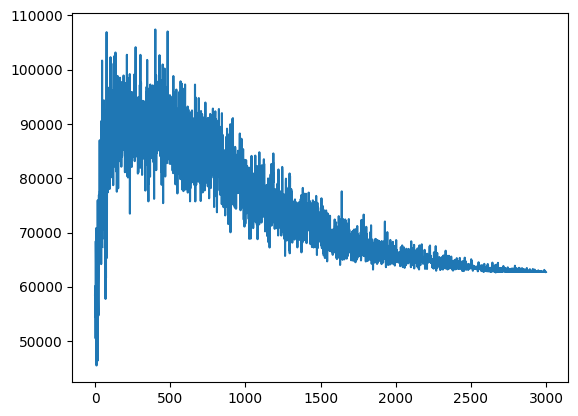

In [226]:
plt.plot(costs)
plt.show()

In [217]:
best_sol = test.best_sol
test.check_valid_solution(test.best_sol)

True

In [218]:
test.facilites_prob

[0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0]

In [219]:
print(test.best_cost)

44414.0


In [209]:
def solution_heatmap(solution):
  plt.figure(figsize = (10,5))
  # Create a heatmap of the solution matrix
  sns.heatmap(solution)

  # Set the title and labels for the heatmap
  plt.title("Solution Matrix")
  plt.xlabel("Demand Points")
  plt.ylabel("Facilities")

  # Display the heatmap
  plt.show()

In [213]:
s = np.array(test.transportation_prob)
result_array = s[:, :, 1]


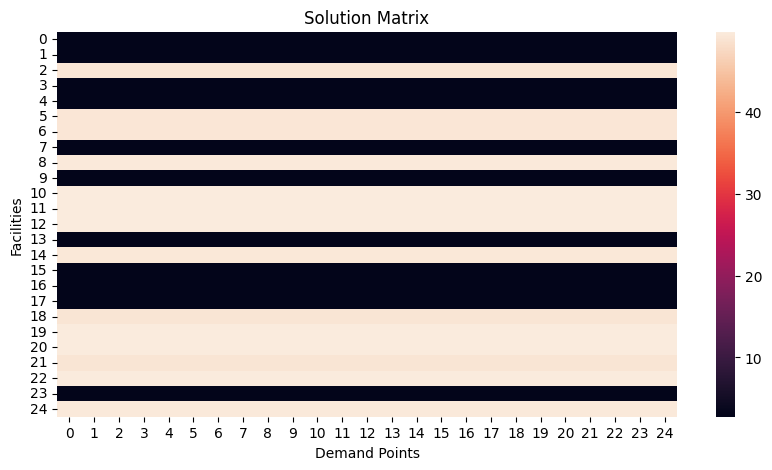

In [214]:
solution_heatmap(result_array)

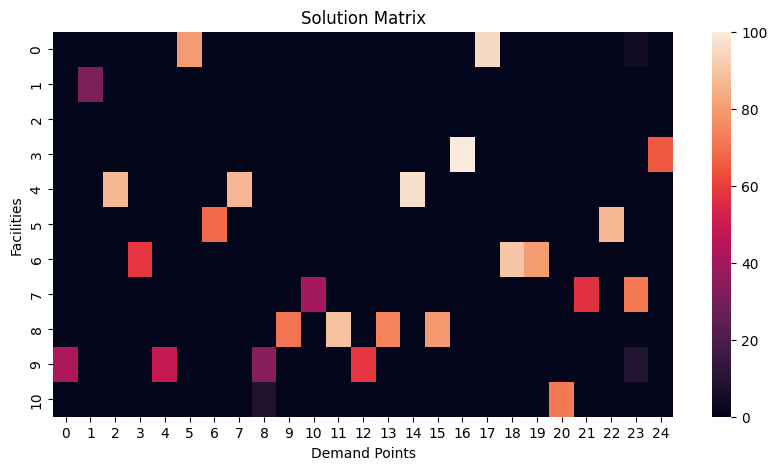

In [212]:
solution_heatmap(test._distribution_matrix(test.best_sol)[1])